In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/CarPrice.csv


Import necessary libraries for the project

In [2]:
#matplotlib and seaborn are imported for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#splitting the dataset into train & test data
from sklearn.model_selection import train_test_split

#GridSearchCV is used for hyperparameter tuning in Lasso & Ridge
from sklearn.model_selection import GridSearchCV

#three linear models used in the project
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#StandardScaler for preprocessing the dataset
from sklearn.preprocessing import StandardScaler

#metrics to evaluate the linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#import warnings to ignore any warnings during execution
import warnings
warnings.filterwarnings('ignore')

**EXPLORATORY DATA ANALYSIS(EDA)**

load the csv file 

In [3]:
data=pd.read_csv("../input/car-price-dataset/CarPrice.csv")


display the first five entries of data

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The dataset contains 205 rows with 26 features

In [5]:
data.shape

(205, 26)

The features in the dataset does not contain any null values

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

info() will return the informations of columns(features),count of non-null values and datatype of individual columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**describe()** describes the features of the dataframe by & default it will show the description of only int and float features but by specifying **include="all"** we will be able to get the description of all features irrespective of its datatypes

In [8]:
data.describe(include="all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


I have dropped two features **car_ID** & **CarName** because they does not effect the price of the car in the dataset.

In [9]:
#data.drop(axis=0) by default so its important to specify the axis=1 else you can specify 
#columns=["car_ID","CarName"]
df_car=data.drop(["car_ID","CarName"],
         axis=1
         )

We are now able to see the remaining columns in the dataset after dropping **car_ID** and **CarName**

In [10]:
df_car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Display the first five entries of dataframe

In [11]:
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Split the dataset into **dependent(y)** & **independent(X)** variables,

Dependent variable is also called the target variable which is **price** of the car in our case

In [12]:
X=df_car.drop(columns=["price"])
y=df_car["price"]

Specify two empty lists **cat_col** & **num_col** to store **categorical** and **numerical** columns respectively

In [13]:
cat_col=[]#will store categorical features
num_col=[]#will store numerical features

#iterating thourgh all columns in X
for col in X:
    #append the features whose datatype is object in cat_col
    if df_car[col].dtype=="O":
        cat_col.append(col)
    #append those features whose datatype is other than object in num_col    
    else:
        num_col.append(col)

Create dataFrames **df_cat** & **df_num** to store the features with datatypes **object** and **numerical** respectively

By dividing the dataframe into **numerical** & **categorical** features seperately, it will allow an ease handling of numerical and categorical features in their respective dataframes.

In [14]:
#dataframe to store the categorical features
df_cat=pd.DataFrame(
    data=df_car,
    #we will use the column names from the cat_col list
    columns=cat_col
)

#dataframe to store the categorical features
df_num=pd.DataFrame(
    data=df_car,
    #we will use the column names from the num_col list
    columns=num_col
)

Display head of Dataframe with numerical features

In [15]:
df_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


Display head of Dataframe with categorical features

In [16]:
df_cat.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Print the **labels** of each columns in **df_cat**

In [17]:
for cols in df_cat:
    print(cols," contains :",df_cat[cols].nunique()," labels")

fueltype  contains : 2  labels
aspiration  contains : 2  labels
doornumber  contains : 2  labels
carbody  contains : 5  labels
drivewheel  contains : 3  labels
enginelocation  contains : 2  labels
enginetype  contains : 7  labels
cylindernumber  contains : 7  labels
fuelsystem  contains : 8  labels


Since the dataset does not contain any null values hence the df_num & df_cat will also have no null values, however we are intrested in df_cat whose datatype is object.

To feed our data to the Machine Learning Models the data values must be converted into numerical values.



Perform **one-hot encoding** to the categorical features, using **pd.get_dummies()**



In [18]:
df_cat=pd.get_dummies(
    data=df_cat,
    drop_first=True
)

Display the head of **one-hot encoded** dataframe

In [19]:
df_cat.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we have converted categorical features into **numerical** values by perfoming **one-hot** encoding & now we have all the features on both **df_num** & **df_cat** in numerical form so we **concatenate** them to get the final desired dataframe.

In [20]:
car_final=pd.concat(
    [df_num,df_cat,y],
    axis=1
)

Split the data into **dependent(y)** and **independent(X)** variables

In [21]:
X=car_final.drop("price",
                axis=1)
y=car_final["price"]

Split the data into **training** and **testing** data, with **test data** of size of **20%** of total dataset.

In [22]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.2
)

Perform preprocessing on the **X_train** and **X_test** using **StandardScaler()**

It will scale the data values in such a way that the **mean is zero** and a **variance of one**

In [23]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Since I am comparing three linear models namely **LinearRegression() Ridge() & Lasso()**, I will have to write the same codes again and again for individual linear models so I have used **functions** that would perform the same job for all three regression models to **ease** and **shorten** my work

The function is used to fit the models in given linear model and return **training** and **testing** **scores**



In [24]:
#the function takes model, train & test split as an argument
def fit_model_getScores(model,X_train,y_train,X_test,y_test):
    #fit the model with training dataset
    model.fit(X_train,y_train)
    
    #score the training data
    train_score=model.score(X_train,y_train)
    #score the test data
    test_score=model.score(X_test,y_test)
    
    #Display the scores
    print("Scores of {}".format(model),"\n")
    print("Training Score:{:.2f}".format(train_score))
    print("Testing Score:{:.2f}".format(test_score))

The function given below will help return the **metrics** used for **evaluating linear models** & that includes **mse,mae,rmse,r2_score**

In [25]:
#function takes model,and test data split as an argument 
def get_metrics(model,X_test,y_test):
    #calculate the predicted value of y 
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)#mse
    r2__score=r2_score(y_test,y_pred)#r2_score
    mae=mean_absolute_error(y_test,y_pred)#mae
    rmse=mean_squared_error(y_test,y_pred,squared=False)#rmse
    
    #print the metrics 
    print("The Metrics for {}:".format(model))
    print("----------------------------")
    print("Mean Squared Error:{:.2f}".format(mse))
    print("Root Mean Squared Error:{:.2f}".format(rmse))
    print("Mean Absolute Error:{:.2f}".format(mae))
    print("r2_score:{:.2f}".format(r2__score))


This function will calculate the **coefficient** of a given **linear model** and will return the **series of coefficient** with **independent features(columns) as an index**.

**Note**: In a linear model the **numbers(count) of coefficient** is always **equal** to **the number of independent features** present in the dataset 

In [26]:
#the function takes model and independent dataframe as an argument
def return_coef_series(model,X):
    #it will give the coefficeint pertaining to a specific linear model
    coef=model.coef_
    
    #make a series out of coefficient with columns of X as an index 
    coef_series=pd.Series(
        data=coef,
        index=X.columns
    )
    
    #return the series
    return coef_series
    

The **plot_coef**() will help **visualize** the **coefficient** of a particular **linear model**

In [27]:
#takes coefficient of linear_model as an argument
def plot_coef(model_coef):
    fig=plt.figure(figsize=(12,8))
    model_coef.plot(
        kind="bar"
    )
    plt.xticks(rotation=90)

The below given function is used to perform h**yper-parameter tuning** for **Ridge()** and **Lasso()** regression.

**GridSearchCV** is used for **hypertuning** and return the **best parameters fitting the linear model.**

In [28]:
#takes model, user-defined hyper-parameters, train & test data splits as argument 
def gridSearch(model,params,X_train,y_train):
    grid=GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5
    )
    grid.fit(X_train,y_train)
   
    return grid.best_params_

**BUILDING LINEAR MODELS**

**1-LinearRegression() Model**

**LinearRegression(aka ordinary least squares):** Simplest & most classic linear method for regression. It finds the parameters w & b that minimize the mean squard error between predicted value and true value.

y=wx + b

w->Weights associated with individual independent features(Slope of a line)

b->y intercept



In [29]:
#initializing the model
linear_model=LinearRegression()

Lets fit the LinearRegression and fetch **training** and **testing** scores

In [30]:
fit_model_getScores(linear_model,
                    X_train_scaled,y_train,
                    X_test_scaled,y_test
                   )

Scores of LinearRegression() 

Training Score:0.95
Testing Score:0.89


Get the **metrics** to evaluate LinearRegression

In [31]:
get_metrics(linear_model,
            X_test_scaled,y_test
           )

The Metrics for LinearRegression():
----------------------------
Mean Squared Error:8482008.48
Root Mean Squared Error:2912.39
Mean Absolute Error:2089.38
r2_score:0.89


The function **return_coef_series** will return the series of **coefficient** along with **features** as its **index**.

In [32]:
linear_coef=return_coef_series(linear_model,X).sort_values()
linear_coef

cylindernumber_four     -3.435686e+03
cylindernumber_six      -2.430446e+03
citympg                 -1.451442e+03
cylindernumber_five     -1.410610e+03
stroke                  -1.228048e+03
carbody_hatchback       -1.213306e+03
compressionratio        -1.050933e+03
carbody_wagon           -1.033287e+03
enginetype_ohcv         -1.018035e+03
carlength               -9.896359e+02
cylindernumber_twelve   -9.407505e+02
carbody_sedan           -8.096386e+02
fueltype_gas            -7.345397e+02
carbody_hardtop         -6.523898e+02
boreratio               -5.667758e+02
enginetype_l            -5.223946e+02
enginetype_dohcv        -4.499925e+02
fuelsystem_spdi         -4.235337e+02
fuelsystem_mfi          -2.108288e+02
doornumber_two          -1.535763e+02
drivewheel_fwd          -1.158464e+02
fuelsystem_4bbl         -7.565888e+01
fuelsystem_spfi         -3.942311e+01
cylindernumber_three    -1.421085e-14
cylindernumber_two       3.790469e+00
enginetype_rotor         3.790469e+00
fuelsystem_2

Lets visualize the coefficient of LinearRegression() model

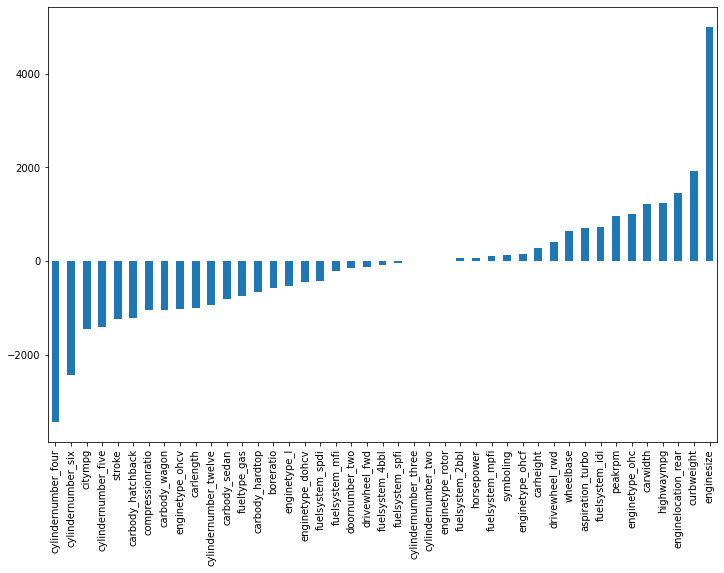

In [33]:
plot_coef(linear_coef)

**2-Ridge():** It is a linear model which uses **L2 regularization** technique.

**L2 Regularization:** Regularization techniques explicitly restricts a model to aviod overfitting.

**LinearRegression()** does not allow us to control its complexity so its very likely that it will **overfit** the models when the dataset is **relatively small**.

**l2 regularization** reduces the cofficient of the independent features to small magnitude as possible i.e all entries of **w should be close to zero**

**Ridge** have **alpha parameter** which makes a trade-off between the simplicity of the model and its perfomance on training set & hence tuning it will yeild different model performance.

In [34]:
ridge_model=Ridge()

Lets perform Hyperparameter tuning and fit the ridge model with the best parameters generated by GridSeachCV hypertuning method

GridSeachCV gave us **alpha=1** and **max_iter=1000** as the best parameters for the model

In [35]:
params={
    "alpha":[1e-9,1e-6,1e-3,1,100,1000,10000],
    "max_iter":[1e3,1e4,1e5,1e6]#maximum number of iterations to run
}

ridge_best_params=gridSearch(ridge_model,params,X_train_scaled,y_train)
ridge_best_params

{'alpha': 1, 'max_iter': 1000.0}

Fit ridge model with best parameters

In [36]:
ridge1_model=Ridge(**ridge_best_params)

Fit the ridge model and return the **test** and **train** scores

Fitting the model we get scores equivalent to the LinearRegression()

In [37]:
fit_model_getScores(ridge1_model,
                    X_train_scaled,y_train,
                    X_test_scaled,y_test
                   )

Scores of Ridge(alpha=1, max_iter=1000.0) 

Training Score:0.95
Testing Score:0.89


Get the metrics to evaluate ridge model

In [38]:
get_metrics(ridge1_model,
            X_test_scaled,y_test
           )

The Metrics for Ridge(alpha=1, max_iter=1000.0):
----------------------------
Mean Squared Error:8998554.91
Root Mean Squared Error:2999.76
Mean Absolute Error:2104.38
r2_score:0.89


Get the coefficeint series of ridge model

From the values returned in series, we can see that the **coefficients** have been **reduced** to the fractions of its original value.

**L2 regularization** technique in Ridge reduces the coefficient the features **as close to zero.**


In [39]:
ridge_coef=return_coef_series(ridge1_model,X).sort_values()
ridge_coef

cylindernumber_four     -2736.884258
cylindernumber_six      -1996.504245
carbody_hatchback       -1184.197681
stroke                  -1176.472164
cylindernumber_five     -1113.246884
carbody_wagon            -984.618424
citympg                  -957.255446
carlength                -935.891048
cylindernumber_twelve    -878.150089
enginetype_ohcv          -838.829223
carbody_sedan            -706.976155
compressionratio         -630.934737
carbody_hardtop          -605.228562
enginetype_l             -586.918819
boreratio                -568.334137
fueltype_gas             -477.024836
fuelsystem_spdi          -416.691487
enginetype_dohcv         -319.679379
fuelsystem_mfi           -218.312850
doornumber_two           -128.609039
drivewheel_fwd           -124.551536
fuelsystem_4bbl          -101.644272
fuelsystem_spfi           -67.405985
fuelsystem_mpfi           -14.645269
cylindernumber_three        0.000000
fuelsystem_2bbl             5.196358
enginetype_ohcf            77.077992
c

Visualize the coefficient series of ridge model

We can see that the upper & lower x-limmits have been reduced.

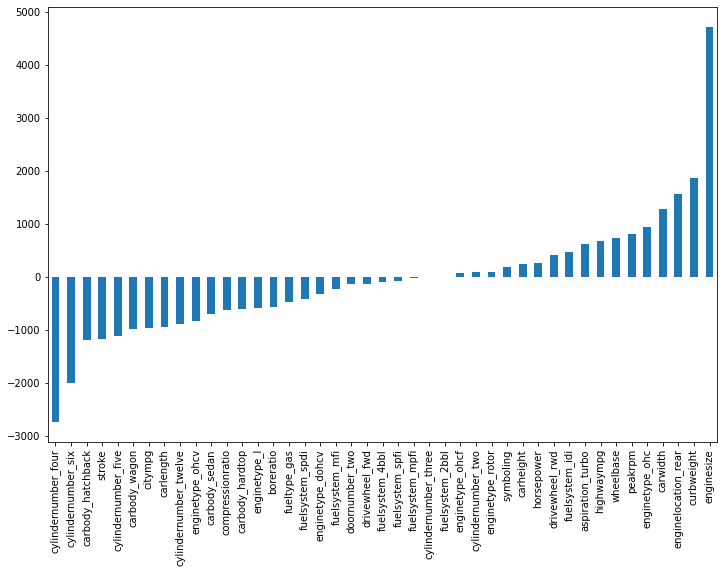

In [40]:
plot_coef(ridge_coef)

**3-Lasso():** It is a linear model which uses **L1 regularization** technique.

**l1 regularization** also reduces the coefficient magnitude however unlike Ridge it **reduces magnitude of some of the features to zero**. Hence it **neglects** some of the features completely.

Hence it is also used for **automatic feature selection** as it ignores some of the features.

**Lasso** also have **alpha parameter** which makes a trade-off between the simplicity of the model and its perfomance on training set & hence tuning it will yeild different model performance.

In [41]:
lasso_model=Lasso()

We got **alpha=100** & **max_iter=1000** for the lasso model 



In [42]:
params={
    "alpha":[1e-9,1e-6,1e-3,1,100,1000,10000],
    "max_iter":[1e3,1e4,1e5,1e6]#maximum number of iterations to run
}

lasso_best_params=gridSearch(lasso_model,params,X_train_scaled,y_train)
lasso_best_params

{'alpha': 100, 'max_iter': 1000.0}

Lets try fitting the Lasso model using the parameters that have been returned from Hypertuning

In [43]:
lasso1_model=Lasso(**lasso_best_params)

The scores are **93% for training set** and **86% for testing set** which is better generalized model than the above two models i.e LinearRegression() & Ridge()

In [44]:
fit_model_getScores(lasso1_model,
                    X_train_scaled,y_train,
                    X_test_scaled,y_test
                   )

Scores of Lasso(alpha=100, max_iter=1000.0) 

Training Score:0.93
Testing Score:0.86


Print the metrics of lasso model

In [45]:
get_metrics(lasso1_model,
            X_test_scaled,y_test
           )

The Metrics for Lasso(alpha=100, max_iter=1000.0):
----------------------------
Mean Squared Error:10833614.66
Root Mean Squared Error:3291.45
Mean Absolute Error:2220.73
r2_score:0.86


Lets see the magnitude of coefficients returned by the lasso model.

This is where it gets very intresting we can see that there are many features whose cofficients are reduced to zero. It means that the Lasso model have completely ignored those features with coefficients equals to zero while fitting the model.

In [46]:
lasso_coef=return_coef_series(lasso1_model,X).sort_values()
lasso_coef

cylindernumber_four      -909.085576
stroke                   -907.851768
carbody_wagon            -487.562265
cylindernumber_twelve    -474.381729
carbody_hatchback        -464.408323
cylindernumber_six       -425.877744
enginetype_l             -402.126046
enginetype_ohcv          -319.794587
fuelsystem_spdi          -164.097286
boreratio                -116.962730
carbody_hardtop          -109.724454
fuelsystem_mfi            -78.165520
fuelsystem_2bbl           -68.385816
enginetype_ohcf            -0.000000
symboling                   0.000000
fuelsystem_4bbl             0.000000
fuelsystem_idi              0.000000
fuelsystem_mpfi             0.000000
cylindernumber_five        -0.000000
cylindernumber_three        0.000000
drivewheel_fwd             -0.000000
doornumber_two              0.000000
carlength                  -0.000000
compressionratio            0.000000
horsepower                  0.000000
carbody_sedan               0.000000
citympg                    -0.000000
h

Lets create Dataframe that stores the features with its corresponding coefficient values

In [47]:
lasso_coef_df=pd.DataFrame(
    data=lasso_coef,
    columns=["Coefficient"]
)
lasso_coef_df

,Coefficient
cylindernumber_four,-909.085576
stroke,-907.851768
carbody_wagon,-487.562265
cylindernumber_twelve,-474.381729
carbody_hatchback,-464.408323
cylindernumber_six,-425.877744
enginetype_l,-402.126046
enginetype_ohcv,-319.794587
fuelsystem_spdi,-164.097286
boreratio,-116.962730


Lets us see how many features have been used in the model and how many have been neglected by the Lasso model

The dataframes below shows the features as an indexes whose coefficient has been reduced to zero and are completely neglected by the Lasso model

In [48]:
features_used=lasso_coef_df[lasso_coef_df["Coefficient"]==0]
features_used

,Coefficient
enginetype_ohcf,-0.0
symboling,0.0
fuelsystem_4bbl,0.0
fuelsystem_idi,0.0
fuelsystem_mpfi,0.0
cylindernumber_five,-0.0
cylindernumber_three,0.0
drivewheel_fwd,-0.0
doornumber_two,0.0
carlength,-0.0


Lasso model have used 26 features out of 43 and have neglected 17 features

In [49]:
print("Total Features:{}".format(X.shape[1]))
print("Features Neglected:{}".format(features_used.shape[0]))
print("Features Used:{}".format(X.shape[1]-features_used.shape[0]))

Total Features:43
Features Neglected:17
Features Used:26


Its is very clear from the plot that many of the features are neglected and its bar are being reduced to 0 magnitude, and hence lasso is moslty used for automatic feature selection.

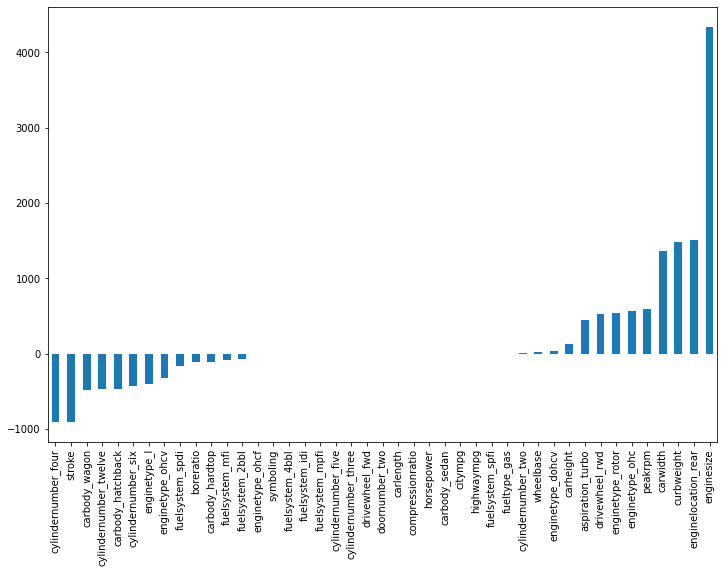

In [50]:
plot_coef(lasso_coef)

**Comparison between the three Linear Models:**

* From the plot below comparing the coefficient of independent features, its clear that **LinearRegression()** model have most coefficients nonzero and are of large magnitude and most of its values are out of y-lim, Which are represented by blue square blocks.

* The **Ridge()** model however have the coefficents whose magnitude are smaller and are close to zero, which are represented with orange **'^'**.

* Comming to **Lasso()** model most of its values are lying either on the horizotal line and few which are very close to horizontal line, owing to its smaller magnitude represented by green **'v'**

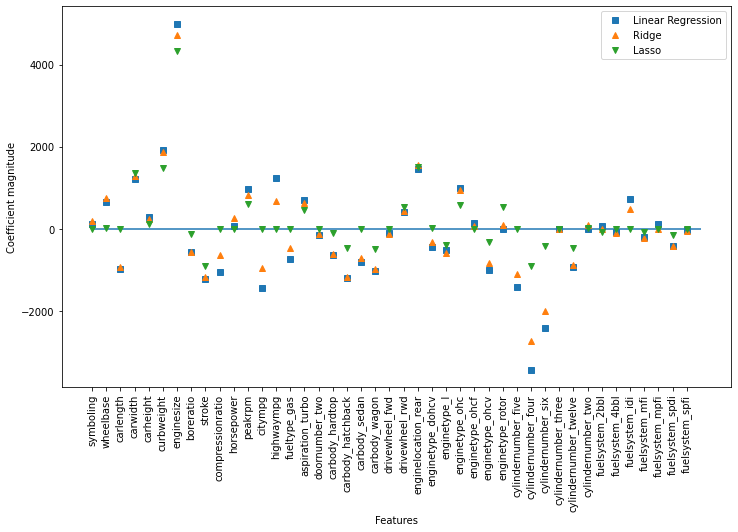

In [51]:
#specify the figure & size
fig=plt.figure(figsize=(12,7))

#plot the coefficient of individual linear models
plt.plot(linear_model.coef_,'s',label="Linear Regression")
plt.plot(ridge1_model.coef_,'^',label="Ridge")
plt.plot(lasso1_model.coef_,'v',label="Lasso")

#specify columns/features as the xticks
plt.xticks(range(X.shape[1]), X.columns,rotation=90)

#the length of horizontal line equals to the length of features
plt.hlines(0,0,X.shape[1])

#specify the x & y labels
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")

plt.legend()
plt.show()